In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
import re
import pickle
import datetime as dt
import math

#
!pip install category_encoders
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.metrics import accuracy_score as acc, precision_score as pre, recall_score as rec, f1_score as f1
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

#
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
!pip install openml
import openml.datasets as datasets
import requests as r

#
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 758.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158701 sha256=0963136a8952093a927838e19d132839a414afff88f45fc76fbc8ce53ca1164a
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=ee80910faf2d08dcc9665d2c9d619e1c7ba4bc0335ed83bb080098f716b276ee
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1

In [5]:
excerise=pd.read_csv("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Calories_Burnt_Prediction/exercise.csv")

In [6]:
excerise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
calories=pd.read_csv("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Calories_Burnt_Prediction/calories.csv")

In [8]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
data=pd.concat([excerise.drop("User_ID",axis=1),calories["Calories"]],axis=1)

In [10]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [13]:
data.shape

(15000, 8)

In [14]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


#**EDA**

In [16]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


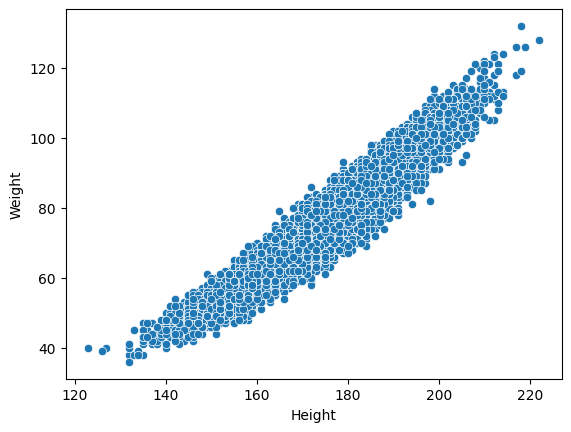

In [17]:
sns.scatterplot(x="Height",y="Weight",data=data);

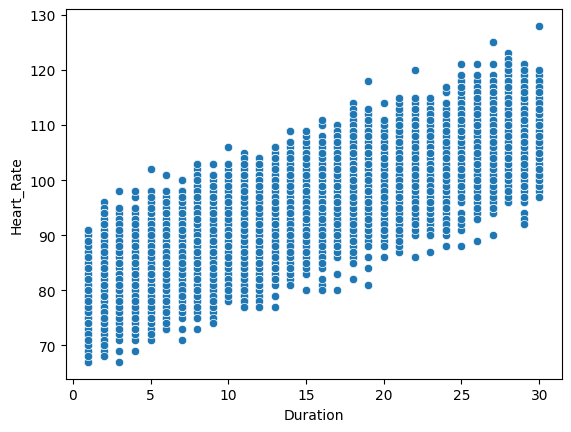

In [18]:
sns.scatterplot(x="Duration",y="Heart_Rate",data=data);

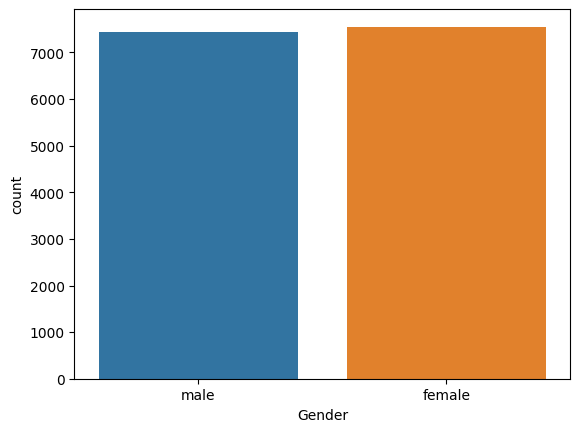

In [19]:
sns.countplot(x="Gender",data=data,hue="Gender");

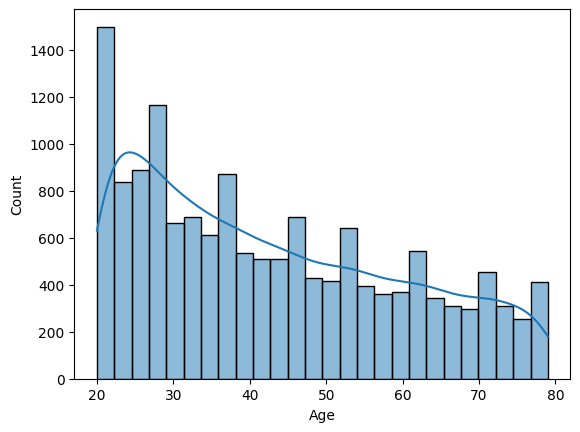

In [20]:
sns.histplot(data["Age"],kde=True);

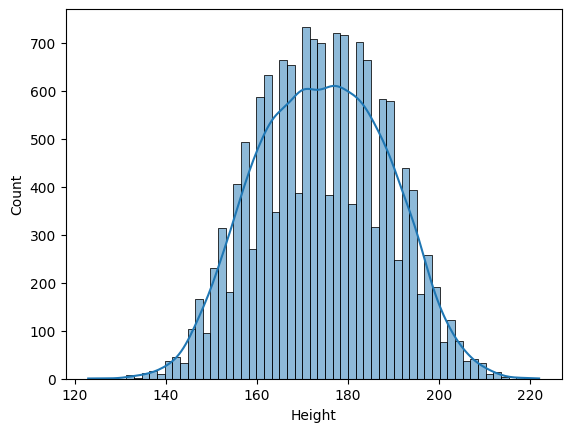

In [21]:
sns.histplot(data["Height"],kde=True);

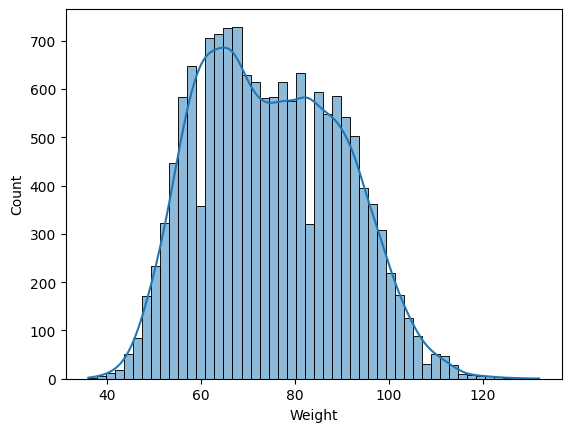

In [22]:
sns.histplot(data["Weight"],kde=True);

In [23]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [24]:
numeric_columns=data.select_dtypes(include=["number"])
correlation=numeric_columns.corr()
correlation

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


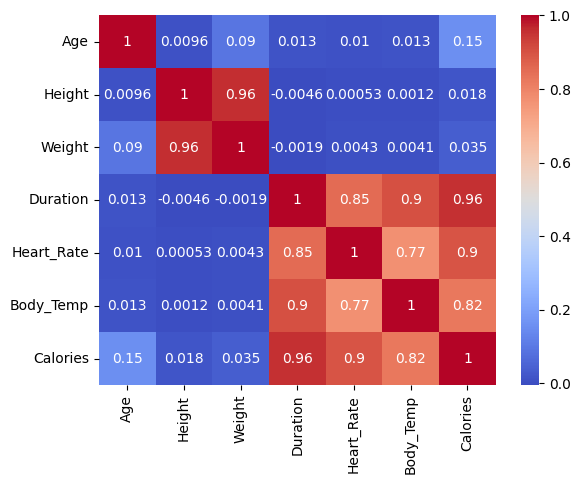

In [25]:
sns.heatmap(correlation,annot=True,cmap="coolwarm");

In [26]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [27]:
gender_map={"male":1,"female":0}
data["Gender"]=data["Gender"].map(gender_map)

In [28]:
data.Gender

,Gender
0,1
1,0
2,1
3,0
4,0
...,...
14995,0
14996,0
14997,0
14998,1


In [29]:
data.notnull().sum()

,0
Gender,15000
Age,15000
Height,15000
Weight,15000
Duration,15000
Heart_Rate,15000
Body_Temp,15000
Calories,15000


#**Splitting training and testing**

In [30]:
x=data.drop("Calories",axis=1)
y=data["Calories"]

In [31]:
x.shape,y.shape

((15000, 7), (15000,))

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#**Training Models**

In [33]:
models={
    "lr":LinearRegression(),
    "rfr":RandomForestRegressor(),
    "dtr":DecisionTreeRegressor(),
    "xgb":XGBRegressor()
}

In [34]:
for name, mod in models.items():
  mod.fit(x_train,y_train)
  y_pred=mod.predict(x_test)
  print(f"{name} mae: {mae(y_test,y_pred)} mse: {mse(y_test,y_pred)} r2: {r2(y_test,y_pred)}")

lr mae: 8.441513553849697 mse: 131.9957457508168 r2: 0.9672937151257296
rfr mae: 1.6840933333333334 mse: 7.085391133333333 r2: 0.9982443614410884
dtr mae: 3.412 mse: 27.746 r2: 0.9931250164544345
xgb mae: 1.4981198125282924 mse: 4.568956111227719 r2: 0.9988678909361673


#**Selecting model**

In [39]:
f_model=XGBRegressor()
f_model.fit(x_train,y_train)
y_predict=f_model.predict(x_test)

#**Predictive System**

In [40]:
x_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,1,37,179.0,77.0,7.0,81.0,39.5
9680,1,23,195.0,87.0,26.0,110.0,40.5
7093,1,33,181.0,77.0,12.0,88.0,40.1
11293,0,66,156.0,54.0,9.0,77.0,39.5
820,0,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,0,75,148.0,51.0,22.0,104.0,40.6
13418,0,21,172.0,67.0,20.0,104.0,40.7
5390,1,57,189.0,92.0,8.0,90.0,39.5
860,1,35,174.0,76.0,12.0,97.0,40.2


In [41]:
def pred(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp):
  features=np.array([[Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp]])
  return f_model.predict(features)[0]

In [42]:
Gender = 1
Age = 36
Height = 167.0
Weight = 64.0
Duration = 28.0
Heart_Rate = 108.0
Body_Temp = 40.0

In [43]:
result=pred(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp)
print("Calories Burnt: ",result)

Calories Burnt:  183.7676


In [45]:
pickle.dump(f_model,open("model.pkl","wb"))

In [46]:
x_train.to_csv("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Calories_Burnt_Prediction/x_train.csv",index=False)

In [47]:
pd.read_csv("/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Calories_Burnt_Prediction/x_train.csv")

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,37,179.0,77.0,7.0,81.0,39.5
1,1,23,195.0,87.0,26.0,110.0,40.5
2,1,33,181.0,77.0,12.0,88.0,40.1
3,0,66,156.0,54.0,9.0,77.0,39.5
4,0,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
11995,0,75,148.0,51.0,22.0,104.0,40.6
11996,0,21,172.0,67.0,20.0,104.0,40.7
11997,1,57,189.0,92.0,8.0,90.0,39.5
11998,1,35,174.0,76.0,12.0,97.0,40.2
